In [1]:
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np
import rasterio as rio
from rasterio.plot import show


# Merging dem files
http://www.webgis.com/terr_pages/TN/dem75/knox.html


In [2]:
!gdal_merge.py -o merged.tiff chattanooga/chattanooga-e.DEM knoxville/knoxville-w.DEM corbin/corbin-e.DEM johnson_city/johnson_city-w.DEM

0...10...20...30...40...50...60...70...80...90...100 - done.


In [3]:
dem = rio.open("../LFBB.tiff")
print(dem.bounds)

BoundingBox(left=-83.97791666666667, bottom=35.54208333333334, right=-83.55208333333334, top=35.88791666666667)


In [4]:
elevation = dem.read(1)

In [16]:
dem.

TypeError: block_size() takes exactly 3 positional arguments (0 given)

In [13]:
dem.xy(1,0)

(-83.9775, 35.88666666666667)

In [5]:
print(dem.lnglat())

(-83.76489519827338, 35.71508739469643)


In [7]:
elevation

array([[ 273,  273,  273, ...,  304,  304,  305],
       [ 267,  267,  268, ...,  304,  304,  304],
       [ 261,  261,  262, ...,  304,  305,  304],
       ...,
       [ 402,  399,  414, ..., 1126, 1126, 1132],
       [ 400,  397,  418, ..., 1111, 1104, 1105],
       [ 396,  412,  429, ..., 1094, 1081, 1074]], dtype=int16)

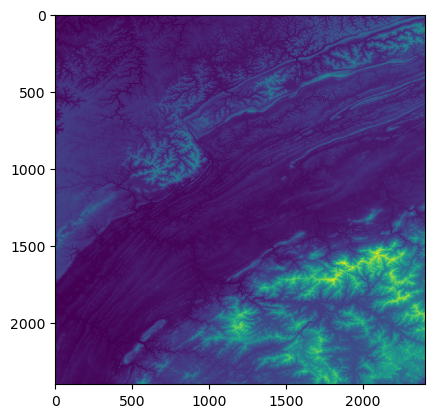

In [19]:
# f = plt.figure()
# plt.imshow(elevation)
# plt.savefig('Tiff.png')
# plt.yticks(labels=)
show(elevation, with_bounds=True)
plt.show()

In [22]:
from mpl_toolkits import mplot3d


In [1]:
256**3

16777216

In [2]:
import math

math.sqrt(5764801)

2401.0

In [1]:
import numpy as np

In [17]:
w = 3
h = 2

data = np.arange(h*w)
print(data)
v = []
idx = []
# off1 = True
for i in range(h):
    # off2 = off1
    for j in range(w):
        z = data[i*w + j]
        v.append([i,j,z])
        if i+1 < h and j+1 < w:
            br = (i+1)*w + (j+1)
            tl = i*w + j
            tr = i*w + (j+1)
            bl = (i+1)*w + j
            # if off2:
            idx.append([tl,tr,bl])
            idx.append([bl,tr,br])
            # else:
    #             idx.append([tl,tr,br])
    #             idx.append([tl,br,bl])
    #         off2 = not off2
    # off1 = not off1
print(idx)
print(v)
for i in idx:
    i1,i2,i3 = i[0], i[1], i[2]
    print('TRIANGLE COORDS')
    print(f'   1 {v[i1]}')
    print(f'   2 {v[i2]}')
    print(f'   3 {v[i3]}')



[0 1 2 3 4 5]
[[0, 1, 3], [3, 1, 4], [1, 2, 4], [4, 2, 5]]
[[0, 0, 0], [0, 1, 1], [0, 2, 2], [1, 0, 3], [1, 1, 4], [1, 2, 5]]
TRIANGLE COORDS
   1 [0, 0, 0]
   2 [0, 1, 1]
   3 [1, 0, 3]
TRIANGLE COORDS
   1 [1, 0, 3]
   2 [0, 1, 1]
   3 [1, 1, 4]
TRIANGLE COORDS
   1 [0, 1, 1]
   2 [0, 2, 2]
   3 [1, 1, 4]
TRIANGLE COORDS
   1 [1, 1, 4]
   2 [0, 2, 2]
   3 [1, 2, 5]


In [18]:
1400/100

14.0

In [19]:
200/100

2.0

In [ ]:
np.arange([
    [0,1,0],
    [0,1,0],
    [0,1,0],
    [0,1,0],
    [0,1,0],
])

In [2]:
def lerp(x0,x1,y0,y1,x):
    return (y0 * (x1-x) + y1 * (x-x0)) / (x1-x0)

In [6]:
lerp(50,100,0,4,70)

1.6

In [7]:
def blerp(q11,q12,q21,q22,x1,x2,y1,y2,x,y):
    x2x1 = x2 - x1
    y2y1 = y2 - y1
    x2x = x2 - x
    y2y = y2 - y
    yy1 = y - y1
    xx1 = x - x1
    return 1 / (x2x1*  y2y1) * (
        q11 * x2x * y2y +
        q21 * xx1 * y2y +
        q12 * x2x * yy1 +
        q22 * xx1 * yy1
    )

In [9]:
blerp(0.1,.2,.4,.4,-83.977, -83.552, 33.542, 33.887, -83.6, 33.6)

0.36801636828645307